In [1]:
# # Unit 7 | Assignment - Distinguishing Sentiments

# ## Background

# **Twitter** has become a wildly sprawling jungle of information—140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

# Choose **one** of the following two assignments, in which you will do just that. Good luck!

# ## News Mood

# In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news outlets, and to present your findings visually.

# Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**.

# ![output_10_0.png](Images/output_10_0.png)

# ![output_13_1.png](Images/output_13_1.png)

# The first plot will be and/or feature the following:

# * Be a scatter plot of sentiments of the last **100** tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
# * Each plot point will reflect the _compound_ sentiment of a tweet.
# * Sort each plot point by its relative timestamp.

# The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

# The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

# Your final Jupyter notebook must:

# * Pull last 100 tweets from each outlet.
# * Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
# * Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
# * Export the data in the DataFrame into a CSV file.
# * Save PNG images for each plot.

# As final considerations:

# * You must complete your analysis using a Jupyter notebook.
# * You must use the Matplotlib or Pandas plotting libraries.
# * Include a written description of three observable trends based on the data.
# * Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.



In [2]:
import json
import tweepy

from config import consumer_key, consumer_secret, access_token, access_token_secret
import config 
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()





In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target User
target_user = "@FoxNews"

In [5]:
# Get all tweets from home feed
public_tweets = api.user_timeline(target_user)

In [6]:

#news organizations: **BBC, CBS, CNN, Fox, and New York times**.
# Target User Accounts
# target_news = ("@FoxNews", "@CNN", "@BBC","@CBS","@nytimes")

# for target in target_news:
    
#news organizations: **BBC, CBS, CNN, Fox, and New York times**.
# Target User Accounts
# target_news = ("@FoxNews", "@CNN", "@BBC","@CBS","@nytimes")

# for target in target_news:
    
target_user = ["@FoxNews", "@CNN", "@BBC","@CBS","@nytimes"] 
count = 0
# List for dictionaries of results
results_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
time_list = []
name_list = []
user_list = []
counter =[]
# Loop through each user
for user in target_user:

  
    

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            #name_news = tweet["name"]
            time_stamp = tweet["created_at"]
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            users = user
            count +=1

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            time_list.append(time_stamp)
            #name_list.append(name_news)
            user_list.append(users)
            counter.append(count)
            if count == 100:
                count = 0
              #create a dictionary of News results
           
        
    
            
    
    
    #create a dictionary of News results
    news_results = {
        "Username":user_list,
        "Compound Score": compound_list,
#         "Postive Score": (positive_list),
#         "Neutral Score": (neutral_list),
#         "Negative Score": (negative_list),
        "Time Stamp":time_list,
        "Tweets Ago": counter
    }
        
              
        
    

In [7]:
#


In [33]:
#convert results list to panda data frame
results_df= pd.DataFrame(news_results)
results_df
results_df.to_csv

<bound method DataFrame.to_csv of      Username  Compound Score                      Time Stamp  Tweets Ago
0    @FoxNews          0.0000  Wed Oct 03 21:44:21 +0000 2018           1
1    @FoxNews         -0.3400  Wed Oct 03 21:29:52 +0000 2018           2
2    @FoxNews          0.0000  Wed Oct 03 21:24:10 +0000 2018           3
3    @FoxNews          0.0000  Wed Oct 03 21:09:58 +0000 2018           4
4    @FoxNews          0.0772  Wed Oct 03 21:04:40 +0000 2018           5
5    @FoxNews          0.0000  Wed Oct 03 20:55:59 +0000 2018           6
6    @FoxNews         -0.2500  Wed Oct 03 20:54:19 +0000 2018           7
7    @FoxNews          0.0000  Wed Oct 03 20:22:27 +0000 2018           8
8    @FoxNews          0.7506  Wed Oct 03 20:22:00 +0000 2018           9
9    @FoxNews          0.0000  Wed Oct 03 20:20:17 +0000 2018          10
10   @FoxNews         -0.6124  Wed Oct 03 20:17:32 +0000 2018          11
11   @FoxNews          0.4404  Wed Oct 03 20:11:34 +0000 2018          12
12  

In [9]:
#We need to split these up based on username
#isolate the type 
Fox =results_df[results_df['Username'] =="@FoxNews"] 
Fox_average_compound =Fox.mean()['Compound Score']
Fox_sum_compound = Fox.sum()['Compound Score']

CNN =results_df[results_df['Username'] =="@CNN"] 
CNN_average_compound =CNN.mean()['Compound Score']
CNN_sum_compound = CNN.sum()['Compound Score']

BBC = results_df[results_df['Username'] =="@BBC"] 
BBC_average_compound =BBC.mean()['Compound Score']
BBC_sum_compound = BBC.sum()['Compound Score']

CBS =results_df[results_df['Username'] =="@CBS"] 
CBS_average_compound =CBS.mean()['Compound Score']
CBS_sum_compound = CBS.sum()['Compound Score']

nytimes =results_df[results_df['Username'] =="@nytimes"] 
nytimes_average_compound =nytimes.mean()['Compound Score']
nytimes_sum_compound = nytimes.sum()['Compound Score']







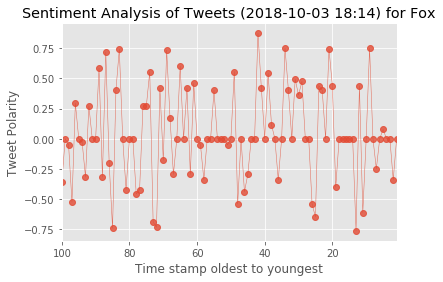

In [30]:
#Create plot
x_vals = Fox["Tweets Ago"]
y_vals = Fox["Compound Score"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for Fox")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Time stamp oldest to youngest")
plt.savefig("Fox.png")
plt.show()


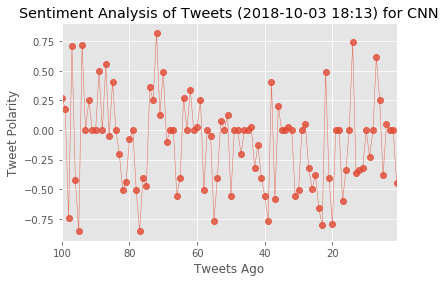

In [29]:
#Create plot
x_vals = CNN["Tweets Ago"]
y_vals = CNN["Compound Score"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for CNN")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("CNN.png")
plt.show()

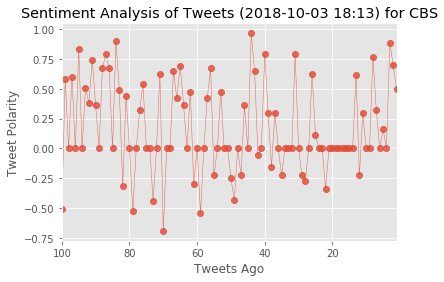

In [28]:
#Create plot
x_vals = CBS["Tweets Ago"]
y_vals = CBS["Compound Score"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for CBS")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("CBS.png")
plt.show()

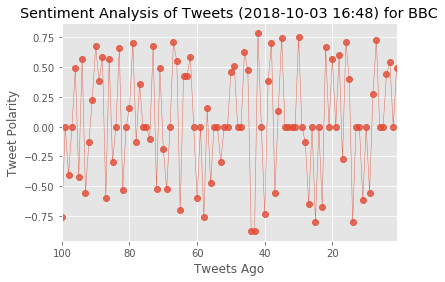

In [15]:
#Create plot
x_vals = BBC["Tweets Ago"]
y_vals = BBC["Compound Score"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for BBC")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
#plt.savefig("../Images/Newssentiment.png")
plt.show()

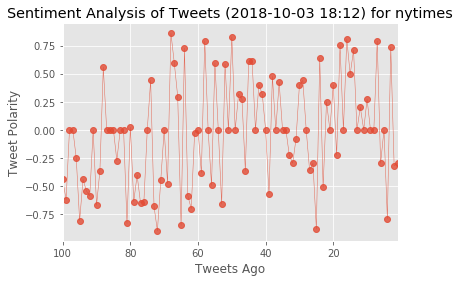

In [27]:
#Create plot
x_vals = nytimes["Tweets Ago"]
y_vals = nytimes["Compound Score"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)
counting=0
# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for nytimes")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("nytimes.png")

plt.show()

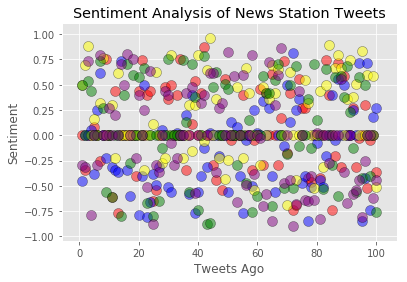

In [31]:
x_axis =Fox["Tweets Ago"],CNN["Tweets Ago"],CBS["Tweets Ago"],BBC["Tweets Ago"],nytimes["Tweets Ago" ]
y_axis =Fox['Compound Score'],CNN['Compound Score'],CBS['Compound Score'],BBC['Compound Score'],nytimes['Compound Score']

color =['red','blue','yellow', 'green', 'purple']

for x in range(5):
    plt.scatter(x_axis[x], y_axis[x], marker="o",c= color[x], edgecolors="black",
            s=(100), alpha=0.5)
plt.title("Sentiment Analysis of News Station Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Sentiment")

plt.savefig("Total_news_sentiment.png")
plt.show()



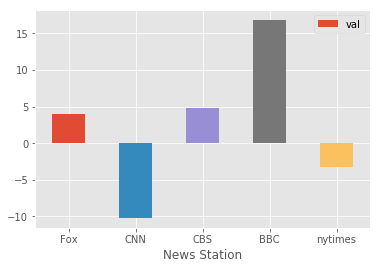

In [32]:
#make bar graph average compound score
df = pd.DataFrame({'News Station':['Fox', 'CNN', 'CBS', 'BBC', 'nytimes'], 'val':[Fox_sum_compound, CNN_sum_compound, BBC_sum_compound,CBS_sum_compound,nytimes_sum_compound]})
ax = df.plot.bar(x='News Station', y='val', rot=0)
plt.savefig("News_station_sum_compound.png")

In [20]:
#print the average compound scores
print(Fox_average_compound)
print(CNN_average_compound)
print(BBC_average_compound)
print(CBS_average_compound)
print(nytimes_average_compound)

0.03954500000000001
-0.10197600000000001
0.048693
0.167799
-0.032257


In [21]:
#print the sum compound scores
print(Fox_sum_compound)
print(CNN_sum_compound)
print(BBC_sum_compound)
print(CBS_sum_compound)
print(nytimes_sum_compound)


3.9545000000000012
-10.197600000000001
4.8693
16.7799
-3.2257000000000002


In [ ]:
#Analysis. Both the average and summed compound scores show that CNN and nytimes are portray the most negative tweets. 
#While BBC and CBS portray the most positive tweets. 

#The news stations with the largest compound scores are also the largest in their respective countries in the list.They have more name recognition
#CNN has a terrible compound score. Which suggests fake news
